In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
#Load the data.
data= pd.read_csv('bom.movie_gross.csv.gz', compression='gzip')
#Check the data types of the columns.  
print(data.dtypes)
#Check the first 5 rows of the data.
print(data.head())
#Check the number of rows and columns in the data.
print(data.shape)


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
(3387, 5)


In [4]:
#Check the number of missing values in each column.
print(data.isnull().sum())
#Check the percentage of missing values in each column.
print(data.isnull().sum()/data.shape[0]*100)
#Check the number of unique values in each column.
print(data.nunique())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64
title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64


In [9]:
#Cleaning the data.

#Fill null in studio column with 'Unknown'.
data['studio'].fillna('Unknown', inplace=True)


#Remove , from the foreign_gross column and convert it to float.
data['foreign_gross'] = data['foreign_gross'].astype(str).str.replace(',', '').astype(float)

#Drop null vaues from all columns.
data.dropna(inplace=True)

#Check the number of missing values in each column after cleaning.
print(data.isnull().sum())


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [20]:
#Check the studio with the highest average domestic gross.
avg_domestic_gross = data.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False)
print(avg_domestic_gross.head(10))

#Check the studio with the highest average foreign gross.
avg_foreign_gross = data.groupby('studio')['foreign_gross'].mean().sort_values(ascending=False)
print(avg_foreign_gross.head(10))

#Check top ten movies with the highest domestic gross.
top_domestic_gross = data [['title','domestic_gross']].sort_values(by='domestic_gross', ascending=False).head(10)
print(top_domestic_gross)

#Check top ten movies with the highest foreign gross.
top_foreign_gross = data [['title','foreign_gross']].sort_values(by='foreign_gross', ascending=False).head(10)
print(top_foreign_gross)

studio
BV         1.768897e+08
P/DW       1.682900e+08
WB         9.325846e+07
WB (NL)    9.034318e+07
Uni.       8.952804e+07
MGM        8.300000e+07
Fox        8.152612e+07
Par.       8.064694e+07
Sony       8.056647e+07
Sum.       6.643364e+07
Name: domestic_gross, dtype: float64
studio
HC          8.676000e+08
P/DW        3.393600e+08
BV          2.480178e+08
GrtIndia    2.340000e+08
Fox         1.496706e+08
WB (NL)     1.440682e+08
WB          1.435993e+08
FUN         1.371500e+08
WAMCR       1.349500e+08
Sony        1.328118e+08
Name: foreign_gross, dtype: float64
                             title  domestic_gross
1872  Star Wars: The Force Awakens     936700000.0
3080                 Black Panther     700100000.0
3079        Avengers: Infinity War     678800000.0
1873                Jurassic World     652300000.0
727          Marvel's The Avengers     623400000.0
2758      Star Wars: The Last Jedi     620200000.0
3082                 Incredibles 2     608600000.0
2323  Rogue One

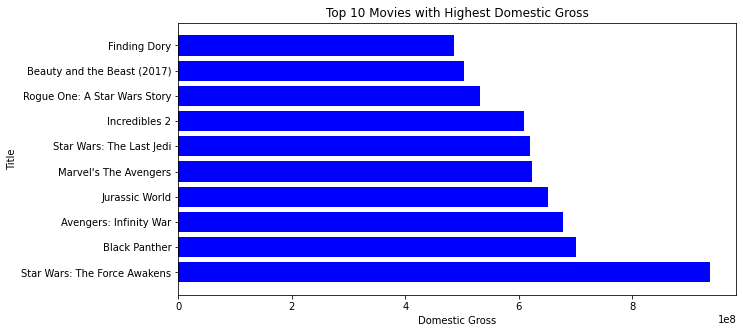

In [19]:
#Plot the top ten movies with the highest domestic gross.
plt.figure(figsize=(10,5))
plt.barh(top_domestic_gross['title'], top_domestic_gross['domestic_gross'], color='blue')
plt.xlabel('Domestic Gross')
plt.ylabel('Title')
plt.title('Top 10 Movies with Highest Domestic Gross')
plt.show()

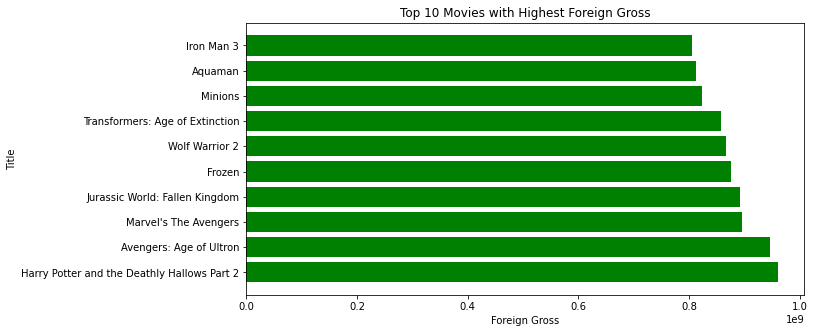

In [21]:
#Plot the top ten movies with the highest foreign gross.
plt.figure(figsize=(10,5))
plt.barh(top_foreign_gross['title'], top_foreign_gross['foreign_gross'], color='green')
plt.xlabel('Foreign Gross')
plt.ylabel('Title')
plt.title('Top 10 Movies with Highest Foreign Gross')
plt.show()


The analysis above shows the movies with the highest incomes and the studios responsible. These are the studios and movies to work with.